<a href="https://colab.research.google.com/github/ParasRupani/COB-DataScience/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [10]:
Train_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml"

test_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRyvZ7lknwiSghK9aen1SaTEYoN3JS40rrGLpcyrsVZy1tB2T4gn6Y3-cdzPUFCPMmmqREWefW3kl4_/pubhtml"

In [3]:
response=requests.get(Train_url)
response.raise_for_status()
soup = BeautifulSoup(response.text, "html.parser")
s = soup.find('table', {'class':'waffle'})
tr = s.find_all('tr')
x = [0,0]
y = []
for i in tr:
    x=i.find_all('td',{'class':'s1'})
    if len(x)>1:
        y.append({'x':int(x[0].text.strip()),
                  'y':x[1].text.strip()})

In [6]:
df = pd.DataFrame(y)
df['y'] = pd.to_numeric(df['y'])
df.to_csv('Train.csv',index=False)
print("Train.csv Successful")

Train.csv Successful


In [7]:
data = pd.read_csv('Train.csv')
data.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


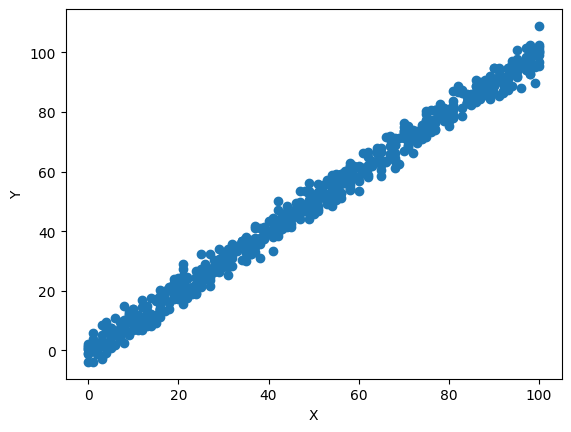

In [5]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df["x"],df["y"])
plt.show()

In [8]:
x_train = data[['x']]
y_train = data['y']

In [9]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
response=requests.get(test_url)
response.raise_for_status()
soup = BeautifulSoup(response.text, "html.parser")
s = soup.find('table', {'class':'waffle'})
tr = s.find_all('tr')
x = [0,0]
y = []
for i in tr:
    x=i.find_all('td',{'class':'s1'})
    if len(x)>1:
        y.append({'x':int(x[0].text.strip()),
                  'y':x[1].text.strip() })

In [13]:
df = pd.DataFrame(y)
df['y'] = pd.to_numeric(df['y'])
df.to_csv('test.csv',index=False)
print("test.csv Successful")

test.csv Successful


In [14]:
x_test = df[['x']]
y_test = df['y']

In [15]:
y_pred = model.predict(x_test)
y_pred

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

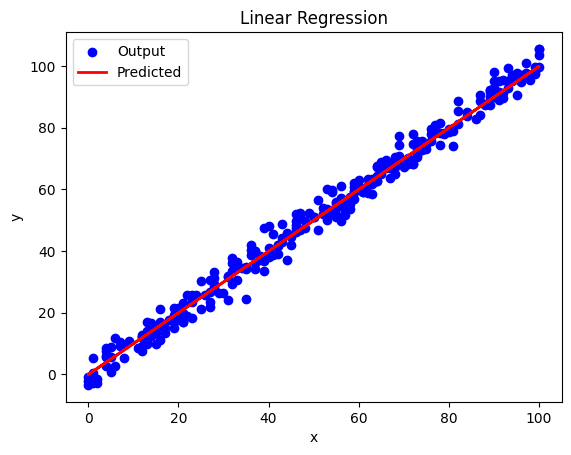

In [16]:
plt.scatter(x_test, y_test, color='blue', label='Output')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [20]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2.round(3))

R-squared Score: 0.989
